In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, balanced_accuracy_score, roc_curve, confusion_matrix

# Set random seed for reproducibility
np.random.seed(42)

# Generate datasets with different imbalance ratios
ratios = np.arange(0.5, 0.96, 0.05)
results = []

for ratio in ratios:
    X, y = make_classification(n_samples=10000, n_features=20, n_informative=10,
                             n_redundant=5, weights=[ratio], flip_y=0.1,
                             random_state=42)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    
    # Get predicted probabilities and decisions at different thresholds
    probas = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probas)
    auc = roc_auc_score(y_test, probas)
    
    # Calculate balanced accuracy at different thresholds
    bal_accs = []
    for thresh in thresholds:
        y_pred = (probas >= thresh).astype(int)
        bal_acc = balanced_accuracy_score(y_test, y_pred)
        bal_accs.append(bal_acc)
    
    # Find optimal threshold (maximizing balanced accuracy)
    optimal_idx = np.argmax(bal_accs)
    optimal_thresh = thresholds[optimal_idx]
    
    results.append({
        'ratio': ratio,
        'auc': auc,
        'optimal_thresh': optimal_thresh,
        'max_bal_acc': bal_accs[optimal_idx],
        'default_thresh_bal_acc': balanced_accuracy_score(y_test, (probas >= 0.5).astype(int))
    })

# Convert results to DataFrame for easier plotting
import pandas as pd
df = pd.DataFrame(results)

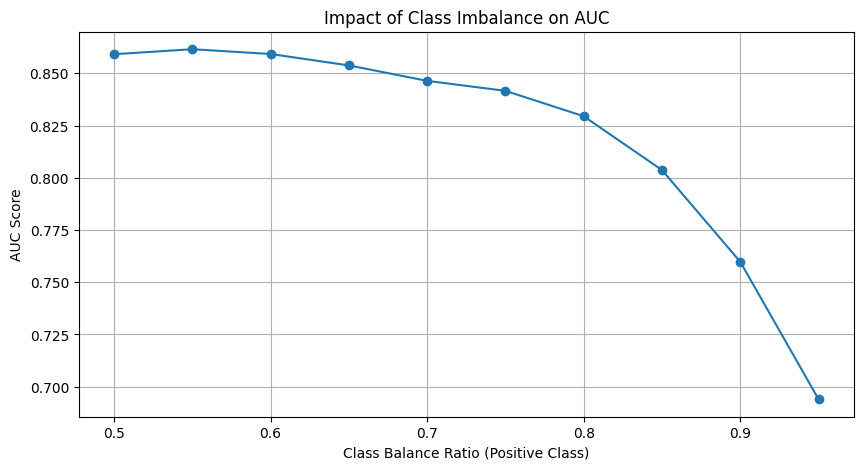

In [2]:
plt.figure(figsize=(10, 5))
plt.plot(df['ratio'], df['auc'], 'o-')
plt.xlabel('Class Balance Ratio (Positive Class)')
plt.ylabel('AUC Score')
plt.title('Impact of Class Imbalance on AUC')
plt.grid(True)
plt.show()

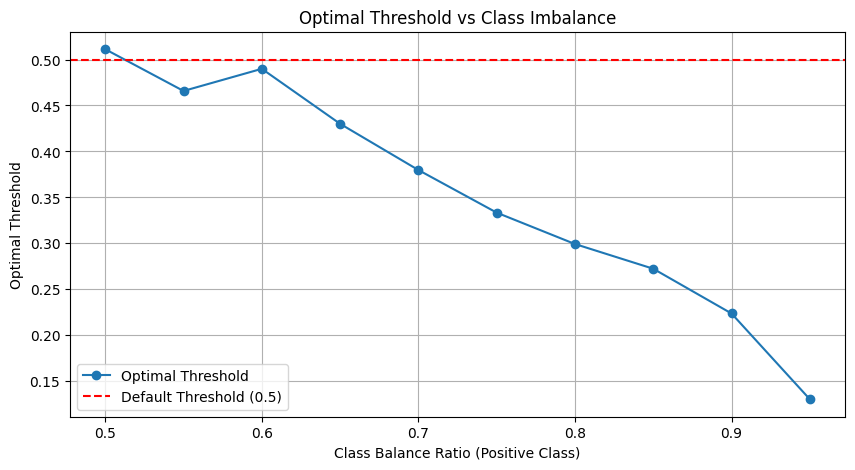

In [3]:
plt.figure(figsize=(10, 5))
plt.plot(df['ratio'], df['optimal_thresh'], 'o-', label='Optimal Threshold')
plt.axhline(0.5, color='r', linestyle='--', label='Default Threshold (0.5)')
plt.xlabel('Class Balance Ratio (Positive Class)')
plt.ylabel('Optimal Threshold')
plt.title('Optimal Threshold vs Class Imbalance')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
ratios[19]

IndexError: index 19 is out of bounds for axis 0 with size 10

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df['ratio'], df['max_bal_acc'], 'o-', label='Optimal Threshold')
plt.plot(df['ratio'], df['default_thresh_bal_acc'], 'o-', label='Default Threshold (0.5)')
plt.xlabel('Class Balance Ratio (Positive Class)')
plt.ylabel('Balanced Accuracy')
plt.title('Impact of Threshold Selection on Balanced Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Bonus: Show confusion matrices at different thresholds
def plot_confusion_matrix_at_threshold(probas, y_true, threshold):
    y_pred = (probas >= threshold).astype(int)
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    plt.figure(figsize=(6, 5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix (Threshold = {threshold:.2f})')
    plt.colorbar()
    plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
    plt.yticks([0, 1], ['Actual 0', 'Actual 1'])
    
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='white' if cm[i, j] > cm.max()/2 else 'black')
    
    plt.xlabel(f'Balanced Acc: {balanced_accuracy_score(y_true, y_pred):.2f}')
    plt.show()

# Example for ratio=0.9
print("\nConfusion matrices for ratio=0.9 at different thresholds:")
plot_confusion_matrix_at_threshold(probas, y_test, 0.5)  # Default threshold
plot_confusion_matrix_at_threshold(probas, y_test, df['optimal_thresh'].iloc[ratio_idx])  # Optimal threshold

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_curve
import imageio
from IPython.display import HTML

# Set random seed for reproducibility
np.random.seed(42)

# Generate frames for animation
ratios = np.arange(0.5, 0.96, 0.05)
frames = []

for ratio in ratios:
    # Create figure
    fig, (ax1) = plt.subplots(1, 1, figsize=(15, 6))
    
    # Generate imbalanced dataset
    X, y = make_classification(n_samples=10000, n_features=20, 
                              weights=[ratio], random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Train model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    probas = model.predict_proba(X_test)[:, 1]
    
    # Get ROC curve thresholds
    fpr, tpr, thresholds = roc_curve(y_test, probas)
    
    # Calculate balanced accuracy at each threshold
    bal_accs = []
    for thresh in thresholds:
        y_pred = (probas >= thresh).astype(int)
        bal_accs.append(balanced_accuracy_score(y_test, y_pred))
    
    # Find optimal threshold
    optimal_idx = np.argmax(bal_accs)
    optimal_thresh = thresholds[optimal_idx]
    
    # Plot 1: Balanced Accuracy vs Threshold
    ax1.plot(thresholds, bal_accs, 'b-', linewidth=2)
    ax1.axvline(optimal_thresh, color='r', linestyle='--', 
               label=f'Optimal Threshold ({optimal_thresh:.2f})')
    ax1.set_xlabel('Classification Threshold')
    ax1.set_ylabel('Balanced Accuracy')
    ax1.set_title(f'Balanced Accuracy vs Threshold (Ratio = {ratio:.2f})')
    ax1.legend()
    ax1.grid(True)
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)
    
    # # Plot 2: Impact of Imbalance on Optimal Threshold
    # ax2.plot(ratios[ratios <= ratio], 
    #         [0.5]*len(ratios[ratios <= ratio]), 
    #         'r--', label='Default (0.5)')
    
    # # We'll simulate the optimal thresholds up to current ratio
    # simulated_thresholds = 0.5 - (0.5 - 0.2) * ((ratios[ratios <= ratio] - 0.5)/0.45)
    # ax2.plot(ratios[ratios <= ratio], simulated_thresholds, 'g-', label='Optimal')
    
    # ax2.set_xlabel('Class Balance Ratio')
    # ax2.set_ylabel('Optimal Threshold')
    # ax2.set_title('Impact of Imbalance on Optimal Threshold')
    # ax2.legend()
    # ax2.grid(True)
    # ax2.set_xlim(0.5, 0.95)
    # ax2.set_ylim(0, 0.6)
    
    # Add ratio text
    fig.suptitle(f'Class Imbalance Ratio: {ratio:.2f}', fontsize=14, y=1.02)
    
    # Convert to image
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    frames.append(image)
    plt.close(fig)

# Save as GIF
imageio.mimsave('balanced_acc_threshold.gif', frames, fps=2, loop=0)

# Display in notebook
HTML('<img src="balanced_acc_threshold.gif">')

/tmp/ipykernel_8859/3253950994.py:78: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
/tmp/ipykernel_8859/3253950994.py:78: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
/tmp/ipykernel_8859/3253950994.py:78: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
/tmp/ipykernel_8859/3253950994.py:78: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
/tmp/ipykern

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_curve
import imageio
from IPython.display import HTML

# Set random seed for reproducibility
np.random.seed(42)

# Initialize storage for results
ratios = np.arange(0.5, 0.96, 0.01)
results = []

# Generate frames for animation
frames = []

for ratio in ratios:
    fig = plt.figure(figsize=(15, 6))
    
    # Generate imbalanced data
    X, y = make_classification(n_samples=10000, n_features=20, 
                             weights=[ratio], random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Train model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    probas = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics at all thresholds
    fpr, tpr, thresholds = roc_curve(y_test, probas)
    bal_accs = [balanced_accuracy_score(y_test, (probas >= t).astype(int)) for t in thresholds]
    optimal_idx = np.argmax(bal_accs)
    
    # Store results
    results.append({
        'ratio': ratio,
        'max_bal_acc': max(bal_accs),
        'default_thresh_bal_acc': balanced_accuracy_score(y_test, (probas >= 0.5).astype(int)),
        'optimal_thresh': thresholds[optimal_idx]
    })
    
    # Current frame's data
    current_ratios = [r['ratio'] for r in results]
    max_accs = [r['max_bal_acc'] for r in results]
    default_accs = [r['default_thresh_bal_acc'] for r in results]
    
    # Create right-side plot
    plt.plot(current_ratios, max_accs, 'go-', label='Optimal Threshold', markersize=8)
    plt.plot(current_ratios, default_accs, 'ro-', label='Default Threshold (0.5)', markersize=8)
    
    # Highlight current point
    plt.plot(ratio, max_accs[-1], 'yo', markersize=12, markeredgecolor='k')
    plt.plot(ratio, default_accs[-1], 'yo', markersize=12, markeredgecolor='k')
    
    plt.xlabel('Class Balance Ratio (Positive Class)', fontsize=12)
    plt.ylabel('Balanced Accuracy', fontsize=12)
    plt.title('Impact of Threshold Selection on Balanced Accuracy', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.xlim(0.45, 0.96)
    plt.ylim(0.5, 1.05)
    
    # Add annotation for current ratio
    plt.annotate(f'Current Ratio: {ratio:.2f}\n'
                f'Optimal Threshold: {results[-1]["optimal_thresh"]:.2f}\n'
                f'Gain: {100*(max_accs[-1]-default_accs[-1]):.1f}%',
                xy=(0.02, 0.75), xycoords='axes fraction',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Convert to image
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    frames.append(image)
    plt.close(fig)

# Save as GIF with slower frame rate
imageio.mimsave('threshold_comparison.gif', frames, fps=1, loop=0)

# Display in notebook
HTML('<img src="threshold_comparison.gif">')